# zadatak 1

In [1]:
!apt-get install -y libhts-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcurl4-gnutls-dev libhts3 libhtscodecs2
Suggested packages:
  libcurl4-doc libgnutls28-dev libidn11-dev libldap2-dev librtmp-dev
The following packages will be REMOVED:
  libcurl4-openssl-dev
The following NEW packages will be installed:
  libcurl4-gnutls-dev libhts-dev libhts3 libhtscodecs2
0 upgraded, 4 newly installed, 1 to remove and 34 not upgraded.
Need to get 6,424 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libcurl4-gnutls-dev amd64 7.81.0-1ubuntu1.20 [380 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts-dev 

In [2]:
!pip install cyvcf2 pandas numpy tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.0 MB/s eta 0:00:00


In [3]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,387 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,245 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,944 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]


In [4]:
!apt-get install -y bcftools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  python3-numpy python3-matplotlib texlive-latex-recommended
The following NEW packages will be installed:
  bcftools
0 upgraded, 1 newly installed, 0 to remove and 100 not upgraded.
Need to get 697 kB of archives.
After this operation, 2,360 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 bcftools amd64 1.13-1 [697 kB]
Fetched 697 kB in 1s (909 kB/s)
Selecting previously unselected package bcftools.
(Reading database ... 126161 files and directories currently installed.)
Preparing to unpack .../bcftools_1.13-1_amd64.deb ...
Unpacking bcftools (1.13-1) ...
Setting up bcftools (1.13-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [5]:
!bcftools index 1KG.subset.bcf

In [6]:
!bcftools index -f 1KG.subset.bcf

In [7]:
from cyvcf2 import VCF
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

def load_bcf_to_dataframe(bcf_path: str) -> pd.DataFrame:
    vcf = VCF(bcf_path)
    samples = vcf.samples

    records = []
    indices = []

    for variant in tqdm(vcf, desc="Učitavanje mutacija"):
        if len(variant.ALT) > 1:
            continue
        gt_types = np.array(variant.gt_types)
        if 3 in gt_types:
            continue
        alt_counts = np.array([0 if gt == 0 else 1 if gt == 1 else 2 for gt in gt_types], dtype=np.uint8)
        index = f"{variant.CHROM}-{variant.POS}"
        records.append(alt_counts)
        indices.append(index)

    df = pd.DataFrame(records, columns=samples, index=indices)
    return df

In [8]:
df = load_bcf_to_dataframe("1KG.subset.bcf")
df.reset_index().to_feather("genotipi.feather")
df.head()

Učitavanje mutacija: 0it [00:00, ?it/s]

,NA12718,NA12748,NA12775,NA12777,NA12778,NA12827,NA12829,NA12842,NA12843,NA12889,...,HG03696,HG03697,HG03698,HG03711,HG03733,HG03736,HG03738,HG03744,HG03745,HG03752
chr1-16949,1,1,1,1,0,1,0,1,1,1,...,0,0,1,0,1,1,0,1,0,1
chr1-17020,0,0,1,0,0,1,0,1,1,1,...,0,0,1,0,0,1,0,1,0,1
chr1-17385,0,0,1,0,0,1,0,1,1,1,...,0,0,1,0,1,1,0,1,0,1
chr1-17697,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
chr1-95622,0,0,1,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,0,0,0


In [9]:
df = pd.read_feather("genotipi.feather").set_index("index")

## zadatak 2

In [10]:
import pandas as pd

In [11]:
disease = pd.read_csv("disease.tsv")

In [12]:
disease.index = df.columns
disease = disease['disease']

In [13]:
disease.head()
print(disease.shape)
print(df.shape[1])

(2501,)
2501


In [14]:
print(all(df.columns == disease.index))

True


In [15]:
if isinstance(disease, pd.DataFrame):
    disease = disease.iloc[:, 0]

disease.head()

,disease
NA12718,0
NA12748,0
NA12775,1
NA12777,0
NA12778,0


In [16]:
with open("disease.tsv") as f:
    print(f.read(500))

disease
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1



In [17]:
print("Broj uzoraka u df:", df.shape[1])
print("Broj uzoraka u disease:", disease.shape[0])
print("Uzroci se poklapaju:", all(df.columns == disease.index))

Broj uzoraka u df: 2501
Broj uzoraka u disease: 2501
Uzroci se poklapaju: True


In [18]:
disease = disease.loc[df.columns]

In [19]:
from scipy.stats import chi2_contingency
from multiprocessing import Pool, cpu_count
import numpy as np
import pandas as pd

def chi2_test_for_variant(genotype, phenotype):

    table = np.zeros((3, 2), dtype=int)
    for g, p in zip(genotype, phenotype):
        table[g, p] += 1
    table += 1
    _, p_value, _, _ = chi2_contingency(table)
    return p_value

def perform_gwas(genotype_df: pd.DataFrame, phenotype_series: pd.Series, p_filter=True) -> pd.DataFrame:

    inputs = [(genotype_df.loc[pos].values, phenotype_series.values) for pos in genotype_df.index]

    with Pool(cpu_count()) as pool:
        p_values = pool.starmap(chi2_test_for_variant, inputs)

    pvals_series = pd.Series(p_values, index=genotype_df.index)
    result = pd.DataFrame({'p_value': pvals_series}).sort_values('p_value')

    if p_filter:
        threshold = 0.05 / len(result)
        result = result[result['p_value'] < threshold]

    return result

In [20]:
gwas_results = perform_gwas(df, disease)

gwas_results.head()

,p_value
index,
chr2-130208191,0.000022


# zadatak 3

In [21]:
import numpy as np
import pandas as pd
import re

def group_mutations(gwas_results, genotype_df, r2_threshold=0.2, distance_threshold=600000):

    significant = gwas_results.index.tolist()
    genotypes = genotype_df.loc[significant]

    r2_matrix = np.corrcoef(genotypes.values)**2

    chroms = [re.split(r"[-]", s)[0] for s in significant]
    positions = [int(re.split(r"[-]", s)[1]) for s in significant]

    groups = []
    assigned = [False] * len(significant)

    for i, idx in enumerate(significant):
        if assigned[i]:
            continue
        group = [idx]
        assigned[i] = True
        for j in range(i + 1, len(significant)):
            if assigned[j]:
                continue

            if chroms[i] == chroms[j] and abs(positions[i] - positions[j]) <= distance_threshold:
                if r2_matrix[i, j] >= r2_threshold:
                    group.append(significant[j])
                    assigned[j] = True
        groups.append(group)


    group_data = []
    for group in groups:
        pvals = gwas_results.loc[group]['p_value']
        lead = pvals.idxmin()
        chrom = lead.split("-")[0]
        pos_list = [int(x.split("-")[1]) for x in group]
        group_data.append({
            'lead_mutation': lead,
            'p_value': pvals.min(),
            'num_mutations': len(group),
            'chromosome': chrom,
            'min_pos': min(pos_list),
            'max_pos': max(pos_list),
            'span': max(pos_list) - min(pos_list),
            'mutations': group
        })

    return pd.DataFrame(group_data)

In [22]:
grouped = group_mutations(gwas_results, df)
grouped.head()

,lead_mutation,p_value,num_mutations,chromosome,min_pos,max_pos,span,mutations
0,chr2-130208191,0.000022,1,chr2,130208191,130208191,0,[chr2-130208191]


# zadatak 5

In [23]:
!pip install intervaltree

  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=1f1c8b803207ca925c7fed5094250c9838a46c83be7e30c0baae80bb41f8aae8
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [24]:
from intervaltree import Interval, IntervalTree
import pandas as pd

entrez = pd.read_csv("entrez.hg38.tsv", sep="\t")
pathways = pd.read_csv("kegg_pathways.tsv", sep="\t")


print(entrez.columns)

print(pathways.columns)

Index(['entrez_id', 'gene_name', 'chromosome', 'start', 'end'], dtype='object')
Index(['name', 'kegg_id', 'genes'], dtype='object')


In [25]:
def build_interval_trees(entrez_df):
    trees = {}

    for _, row in entrez_df.iterrows():
        chrom = str(row["chromosome"])
        if not chrom.startswith("chr"):
            chrom = "chr" + chrom
        if chrom not in trees:
            trees[chrom] = IntervalTree()
        trees[chrom].add(Interval(row["start"], row["end"] + 1, row["gene_name"]))

    return trees

interval_trees = build_interval_trees(entrez)

In [26]:
def find_lead_mutation_genes(grouped_df, interval_trees):
    results = []

    for _, row in grouped_df.iterrows():
        chrom, pos = row["lead_mutation"].split("-")
        pos = int(pos)

        genes = interval_trees.get(chrom, IntervalTree()).overlap(pos, pos + 1)
        gene_names = [interval.data for interval in genes]

        results.append({
            **row,
            "lead_gene": gene_names[0] if gene_names else ""
        })

    return pd.DataFrame(results)

In [27]:
grouped_with_genes = find_lead_mutation_genes(grouped, interval_trees)
grouped_with_genes.head()

,lead_mutation,p_value,num_mutations,chromosome,min_pos,max_pos,span,mutations,lead_gene
0,chr2-130208191,0.000022,1,chr2,130208191,130208191,0,[chr2-130208191],


In [28]:
grouped_with_genes.to_csv("grouped_with_genes.tsv", sep="\t", index=False)

# zadatak 6

In [29]:
def annotate_groups(grouped, entrez, pathways):
    annotated = []

    for _, row in grouped.iterrows():
        chrom = row["chromosome"]
        start = row["min_pos"]
        end = row["max_pos"]

        region_genes = entrez[
            (entrez["chromosome"] == chrom) &
            (entrez["start"] <= end) &
            (entrez["end"] >= start)
        ].copy()

        if region_genes.empty:
            annotated.append({**row, "genes": "", "pathways": ""})
            continue

        gene_list = region_genes["gene_name"].dropna().unique().tolist()
        gene_str = ", ".join(gene_list)

        matched_pathways = pathways[pathways["genes"].apply(
            lambda x: any(gene in x.split(",") for gene in gene_list)
        )]

        pathway_names = matched_pathways["name"].dropna().unique().tolist()
        pathway_str = ", ".join(pathway_names)

        annotated.append({
            **row,
            "genes": gene_str,
            "pathways": pathway_str
        })

    return pd.DataFrame(annotated)

In [31]:
annotated = annotate_groups(grouped_with_genes, entrez, pathways)

In [32]:
annotated.to_csv("annotated_groups.tsv", sep="\t", index=False)

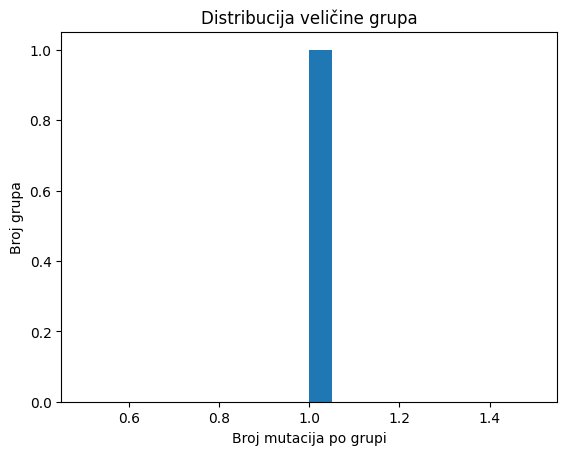

In [33]:
import matplotlib.pyplot as plt

plt.hist(annotated["num_mutations"], bins=20)
plt.xlabel("Broj mutacija po grupi")
plt.ylabel("Broj grupa")
plt.title("Distribucija veličine grupa")
plt.show()

In [34]:
from collections import Counter

gene_counter = Counter()

for gene_list in annotated["genes"]:
    gene_counter.update(gene_list.split(", ") if gene_list else [])

top_genes = gene_counter.most_common(10)
for gene, count in top_genes:
    print(f"{gene}: {count} puta")

In [35]:
pathway_counter = Counter()

for path_list in annotated["pathways"]:
    pathway_counter.update(path_list.split(", ") if path_list else [])

top_paths = pathway_counter.most_common(10)
for path, count in top_paths:
    print(f"{path}: {count} puta")

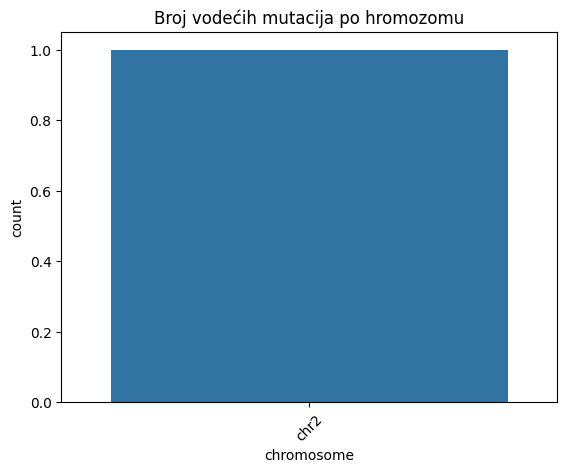

In [36]:
import seaborn as sns

sns.countplot(data=annotated, x="chromosome", order=sorted(annotated["chromosome"].unique()))
plt.title("Broj vodećih mutacija po hromozomu")
plt.xticks(rotation=45)
plt.show()

In [37]:
annotated.sort_values("p_value").head(5)

,lead_mutation,p_value,num_mutations,chromosome,min_pos,max_pos,span,mutations,lead_gene,genes,pathways
0,chr2-130208191,0.000022,1,chr2,130208191,130208191,0,[chr2-130208191],,,


def compute_pathway_scores(annotated, pathways, threshold=0.7):
    result = []
    for _, row in annotated.iterrows():
        genes = row["genes"].split(", ") if row["genes"] else []
        if not genes:
            continue
        group_gene_set = set(genes)
        for _, path_row in pathways.iterrows():
            path_genes = set(path_row["genes"].split(","))
            score = len(group_gene_set & path_genes) / len(group_gene_set)
            if score >= threshold:
                result.append({
                    "group": row["lead_mutation"],
                    "pathway": path_row["name"],
                    "score": score
                })
    return pd.DataFrame(result)

In [39]:
def compute_pathway_scores(annotated, pathways, threshold=0.7):
    result = []
    for _, row in annotated.iterrows():
        genes = row["genes"].split(", ") if row["genes"] else []
        if not genes:
            continue
        group_gene_set = set(genes)
        for _, path_row in pathways.iterrows():
            path_genes = set(path_row["genes"].split(","))
            score = len(group_gene_set & path_genes) / len(group_gene_set)
            if score >= threshold:
                result.append({
                    "group": row["lead_mutation"],
                    "pathway": path_row["name"],
                    "score": score
                })
    return pd.DataFrame(result)

In [40]:
pathway_scores = compute_pathway_scores(annotated, pathways, threshold=0.3)
print("Broj pronađenih pathway-a:", len(pathway_scores))
pathway_scores.head()

Broj pronađenih pathway-a: 0


""


# zadatak 4

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import precision_score, recall_score, accuracy_score

df = pd.read_feather("genotipi.feather").set_index("index")
genotipi_df = df.reset_index()
disease_df = pd.read_csv("disease.tsv", sep="\t")
env_df = pd.read_csv("env_factors.tsv", sep="\t")
groups_df = pd.read_csv("annotated_groups.tsv", sep="\t")

top_groups = groups_df.nsmallest(4, "p_value")
top_mutations = top_groups["lead_mutation"].tolist()

genotipi_top = genotipi_df[genotipi_df["index"].isin(top_mutations)].set_index("index")
genotipi_transposed = genotipi_top.T
genotipi_transposed.columns = [f"mut_{m}" for m in genotipi_transposed.columns]
genotipi_transposed.index.name = "id"
genotipi_transposed.reset_index(inplace=True)

disease_df = disease_df.rename(columns={disease_df.columns[0]: "status"})
disease_df["id"] = genotipi_transposed["id"].values
env_df["id"] = genotipi_transposed["id"].values

X_mut = genotipi_transposed.merge(disease_df, on="id")
X_env = env_df.merge(disease_df, on="id")
X_all = genotipi_transposed.merge(env_df, on="id").merge(disease_df, on="id")

In [43]:
def evaluate_naive_bayes(df, label_col="status"):
    X = df.drop(columns=["id", label_col])
    y = df[label_col].astype("category").cat.codes

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = CategoricalNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, accuracy

In [44]:
metrics_mut = evaluate_naive_bayes(X_mut)
metrics_env = evaluate_naive_bayes(X_env)
metrics_all = evaluate_naive_bayes(X_all)

print("=== Samo mutacije ===")
print(f"Preciznost: {metrics_mut[0]:.2f}, Odziv: {metrics_mut[1]:.2f}, Tačnost: {metrics_mut[2]:.2f}")

print("\n=== Samo fenotipski podaci ===")
print(f"Preciznost: {metrics_env[0]:.2f}, Odziv: {metrics_env[1]:.2f}, Tačnost: {metrics_env[2]:.2f}")

print("\n=== Kombinacija mutacija i fenotipa ===")
print(f"Preciznost: {metrics_all[0]:.2f}, Odziv: {metrics_all[1]:.2f}, Tačnost: {metrics_all[2]:.2f}")

=== Samo mutacije ===
Preciznost: 0.00, Odziv: 0.00, Tačnost: 0.86

=== Samo fenotipski podaci ===
Preciznost: 0.00, Odziv: 0.00, Tačnost: 0.86

=== Kombinacija mutacija i fenotipa ===
Preciznost: 0.00, Odziv: 0.00, Tačnost: 0.86


In [45]:
!pip install imbalanced-learn

In [46]:
from imblearn.over_sampling import RandomOverSampler

def evaluate_naive_bayes_oversampled(df, label_col="status"):
    X = df.drop(columns=["id", label_col])
    y = df[label_col].astype("category").cat.codes

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

    model = CategoricalNB()
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, accuracy

In [47]:
metrics_mut = evaluate_naive_bayes_oversampled(X_mut)
metrics_env = evaluate_naive_bayes_oversampled(X_env)
metrics_all = evaluate_naive_bayes_oversampled(X_all)

print("=== Samo mutacije (oversample) ===")
print(f"Preciznost: {metrics_mut[0]:.2f}, Odziv: {metrics_mut[1]:.2f}, Tačnost: {metrics_mut[2]:.2f}")

print("\n=== Samo fenotipski podaci (oversample) ===")
print(f"Preciznost: {metrics_env[0]:.2f}, Odziv: {metrics_env[1]:.2f}, Tačnost: {metrics_env[2]:.2f}")

print("\n=== Kombinacija mutacija i fenotipa (oversample) ===")
print(f"Preciznost: {metrics_all[0]:.2f}, Odziv: {metrics_all[1]:.2f}, Tačnost: {metrics_all[2]:.2f}")

=== Samo mutacije (oversample) ===
Preciznost: 0.17, Odziv: 0.28, Tačnost: 0.70

=== Samo fenotipski podaci (oversample) ===
Preciznost: 0.19, Odziv: 0.82, Tačnost: 0.46

=== Kombinacija mutacija i fenotipa (oversample) ===
Preciznost: 0.19, Odziv: 0.86, Tačnost: 0.45


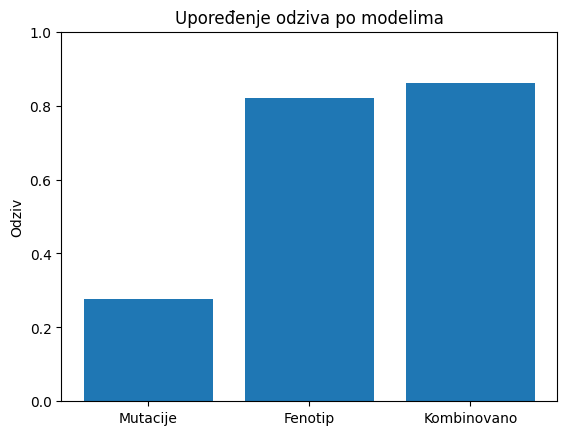

In [48]:
import matplotlib.pyplot as plt

labels = ["Mutacije", "Fenotip", "Kombinovano"]
recalls = [metrics_mut[1], metrics_env[1], metrics_all[1]]

plt.bar(labels, recalls)
plt.ylabel("Odziv")
plt.title("Upoređenje odziva po modelima")
plt.ylim(0, 1)
plt.show()

Prvo je izvedena evaluacija Naivnog Bajesovog klasifikatora na originalnim podacima, gde je tačnost bila visoka, ali preciznost i odziv zanemarljivi. Nakon balansiranja podataka pomoću Random Oversamplinga, modeli su pokazali značajan porast u odzivu, što znači da bolje prepoznaju obolele osobe. Iako je tačnost opala, dobili smo korisnije modele za realnu primenu u medicinskoj dijagnostici, gde je važno identifikovati što više zahvaćenih slučajeva, čak i po cenu većeg broja lažno pozitivnih.